In [ ]:
import geopandas as gpd
#from modules.dataset_modules.data_transform_pob import output_file_path

In [ ]:
tidy_pob_data_path = os.path.abspath(os.path.join("data", "interim", "pob",'pob_tidy_data.csv'))
df_pob = pd.read_csv(tidy_pob_data_path, encoding='utf-8')

In [52]:
df.head()

,ent,mun,nom_loc,ageb,pob_tot
0,1,0,Total de la entidad,0000,1425607
1,1,1,Total del municipio,0000,948990
2,1,1,Total de la localidad urbana,0000,863893
3,1,1,Total AGEB urbana,0017,2237
4,1,1,Aguascalientes,0017,170


In [53]:
df.tail()

,ent,mun,nom_loc,ageb,pob_tot
1683499,32,58,Santa MarÃ­a de la Paz,0123,2
1683500,32,58,Santa MarÃ­a de la Paz,0123,0
1683501,32,58,Santa MarÃ­a de la Paz,0123,0
1683502,32,58,Santa MarÃ­a de la Paz,0123,2
1683503,32,58,Santa MarÃ­a de la Paz,0123,26


In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install descartes - Geopandas requirment
!pip install descartes
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install tools to use in notebook
!pip install mapclassify
!pip install palettable
!pip install contextily

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive

In [57]:
def download_shp(url, temp_dir='temp'):
    response = requests.get(url) # Descargar el archivo ZIP
    os.makedirs(temp_dir, exist_ok=True) # Crear un directorio temporal para extraer archivos
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file: # Extraer el ZIP principal
        zip_file.extractall(temp_dir)  # Extraer todos los archivos en el directorio temporal
        shp_files = [f for f in zip_file.namelist() if f.endswith('.shp')] # Buscar el archivo .shp
        shp_file_path = os.path.join(temp_dir, shp_files[0])  # Obtener la ruta del primer archivo .shp
        gdf = gpd.read_file(shp_file_path) # Cargar el shapefile
        print(f"Archivo .shp cargado correctamente desde {url}.")
        print(gdf.head())
        return gdf  # Devolver gdf

In [58]:
urls = [
    'https://www.inegi.org.mx/contenidos/descargadenue/MGdescarga/MGN2020_1/2020_1_00_ENT.zip',
    'https://www.inegi.org.mx/contenidos/descargadenue/MGdescarga/MGN2020_1/2020_1_00_MUN.zip'
]
gdf_list = []
for url in urls:
    gdf = download_shp(url)
    if gdf is not None:
        gdf_list.append(gdf)

Archivo .shp cargado correctamente desde https://www.inegi.org.mx/contenidos/descargadenue/MGdescarga/MGN2020_1/2020_1_00_ENT.zip.
  CVEGEO CVE_ENT                NOMGEO  \
0     01      01        Aguascalientes   
1     02      02       Baja California   
2     03      03   Baja California Sur   
3     04      04              Campeche   
4     05      05  Coahuila de Zaragoza   

                                            geometry  
0  POLYGON ((-102.28787 22.41649, -102.28753 22.4...  
1  MULTIPOLYGON (((-112.30067 28.38702, -112.2982...  
2  MULTIPOLYGON (((-109.89451 22.87476, -109.8946...  
3  MULTIPOLYGON (((-91.9565 20.197, -91.95636 20....  
4  POLYGON ((-102.31079 29.87695, -102.3105 29.87...  
Archivo .shp cargado correctamente desde https://www.inegi.org.mx/contenidos/descargadenue/MGdescarga/MGN2020_1/2020_1_00_MUN.zip.
  CVEGEO CVE_ENT CVE_MUN          NOMGEO  \
0  01001      01     001  Aguascalientes   
1  01002      01     002        Asientos   
2  01003      01     00

<Axes: >

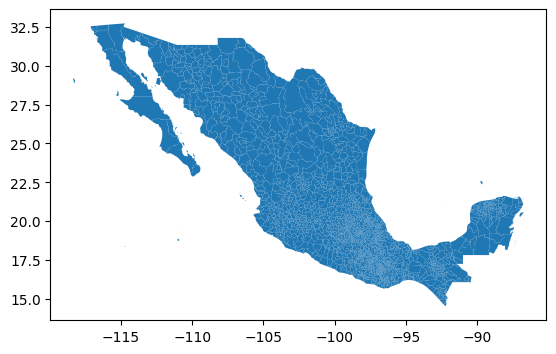

In [59]:
gdf.plot()